In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import pyplot as mp

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
lat = []
long = []
lat_longs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        lat_longs.append(lat_lng)
        

In [3]:
#Print the city count to confirm sufficient count
len(cities)

615

In [4]:
## Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Set up response lists
cloudiness = []
date = []
humidity = []
max_temp = []
wind_speed = []
city_id = []
latitude = []
longitude = []
found_city = []

#Find the weather for each city
for city in cities:
    # Get weather data, skip if the city name does not exist
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all']) 
        humidity.append(response['main']['humidity'])       
        max_temp.append(response['main']['temp_max'])        
        wind_speed.append(response['wind']['speed'])     
        city_id.append(response['id'])      
        date.append(response['dt']) 
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        found_city.append(response['name'])
    except(KeyError,IndexError):
        print(f"missing city", city, "skip")
    print(city, "processed")
    

port alfred processed
bredasdorp processed
ushuaia processed
berlevag processed
sinnamary processed
port lincoln processed
klaksvik processed
cidreira processed
codrington processed
choya processed
missing city stoyba skip
stoyba processed
namibe processed
rikitea processed
ancud processed
komsomolskiy processed
troitskoye processed
vaini processed
coquimbo processed
chabahar processed
missing city illoqqortoormiut skip
illoqqortoormiut processed
butaritari processed
missing city bac lieu skip
bac lieu processed
carnarvon processed
meadow lake processed
honningsvag processed
hobart processed
missing city belushya guba skip
belushya guba processed
constitucion processed
bluff processed
inongo processed
punta arenas processed
taunggyi processed
ahipara processed
jamestown processed
esperance processed
khani processed
norman wells processed
bambous virieux processed
hermanus processed
kapaa processed
kahului processed
atuona processed
saldanha processed
hambantota processed
arraial do cab

missing city saleaula skip
saleaula processed
natal processed
kokopo processed
laerdalsoyri processed
lasa processed
nalut processed
bonthe processed
ambon processed
severo-kurilsk processed
missing city mme skip
mme processed
shubarshi processed
taltal processed
sibu processed
bulaevo processed
thung song processed
port hedland processed
harper processed
barcelos processed
missing city barawe skip
barawe processed
opelousas processed
vanavara processed
san rafael processed
tuatapere processed
praia processed
nemuro processed
missing city hihifo skip
hihifo processed
missing city qui nhon skip
qui nhon processed
san juan bautista processed
nanakuli processed
kutiyana processed
ilulissat processed
toamasina processed
mackay processed
kondinskoye processed
missing city kalomo skip
kalomo processed
missing city rudbar skip
rudbar processed
moquegua processed
marsa matruh processed
hithadhoo processed
shigony processed
missing city buariki skip
buariki processed
zhigansk processed
kangaats

In [5]:
#Build a dataframe of the data and display
city_file_df =pd.DataFrame({"City":found_city, "City ID": city_id,"Date":date, "Max Temperature":max_temp, 
             "Cloudiness":cloudiness, "Humidity":humidity, "Wind Speed":wind_speed, 
            "Latitude":latitude, "Longitude":longitude})
city_file_df.to_csv("city.csv")
city_file_df.head()

,City,City ID,Date,Max Temperature,Cloudiness,Humidity,Wind Speed,Latitude,Longitude
0,Port Alfred,964432,1552092112,18.33,92,89,1.79,-33.59,26.89
1,Bredasdorp,1015776,1552091487,19.00,92,88,5.70,-34.53,20.04
2,Ushuaia,3833367,1552089600,10.00,75,61,15.40,-54.81,-68.31
3,Berlevag,780687,1552092218,-7.90,76,100,3.57,70.86,29.09
4,Sinnamary,3380290,1552092335,26.50,80,92,5.12,5.38,-52.96


In [6]:
#Determine the day the data is pulled
type(city_file_df["Date"][0])
date = time.gmtime(city_file_df["Date"][0])
time_string = time.strftime("%b %d %Y", date)
print (time_string)

Mar 09 2019


#### Latitude vs. Temperature Plot

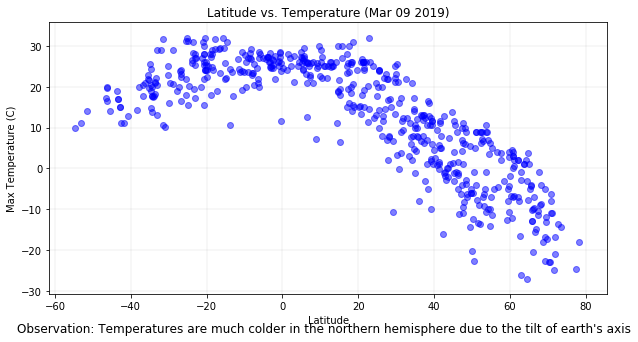

<Figure size 432x288 with 0 Axes>

In [7]:
#Scatterplot of Latitude vs Temp
y = city_file_df['Max Temperature']
x = city_file_df['Latitude']
fig, ax = plt.subplots(figsize=(10,5))
for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="blue")

#add legend
plt.title(f"Latitude vs. Temperature ({time_string})")
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#add commentary
plt.text(-70, -40,"Observation: Temperatures are much colder in the northern hemisphere due to the tilt of earth's axis", fontsize=12)

#display plot and save as a png
plt.show()
mp.savefig('Lat_vs_temp.png')

#### Latitude vs. Humidity Plot

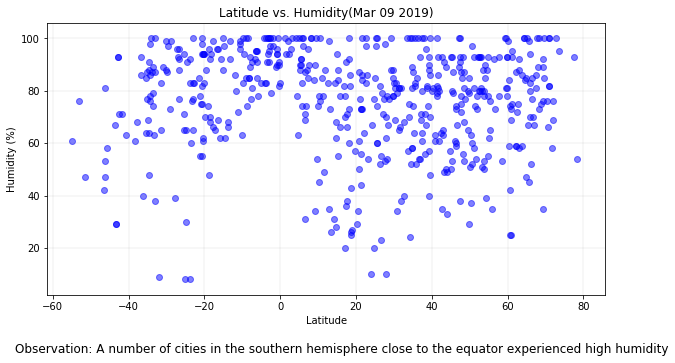

<Figure size 432x288 with 0 Axes>

In [14]:
#Scatterplot of Latitude vs Humidity
y = city_file_df['Humidity']
x = city_file_df['Latitude']
fig, ax = plt.subplots(figsize=(10,5))
for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50,color="blue")

#add legend
plt.title(f"Latitude vs. Humidity({time_string})")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5) 

#add commentary
plt.text(-70, -20,"Observation: A number of cities in the southern hemisphere close to the equator experienced high humidity", fontsize=12)

#Display plot and save as a png file
plt.show()
mp.savefig('Lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

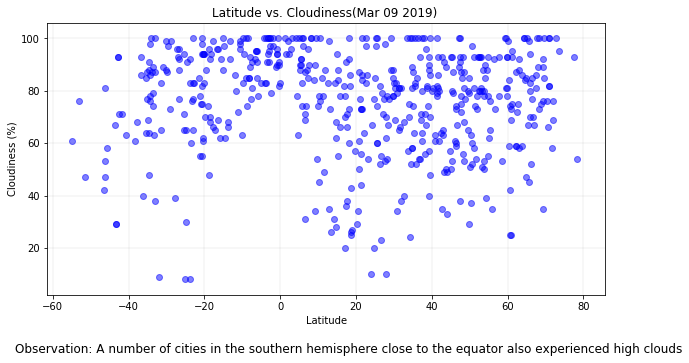

<Figure size 432x288 with 0 Axes>

In [15]:
#Scatterplot of Latitude vs Cloudiness
y = city_file_df['Humidity']
x = city_file_df['Latitude']
fig, ax = plt.subplots(figsize=(10,5))
for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="blue")

#add legend
plt.title(f"Latitude vs. Cloudiness({time_string}) ")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5) 

#add commentary
plt.text(-70, -20,"Observation: A number of cities in the southern hemisphere close to the equator also experienced high clouds", fontsize=12)
#Display plot and show as a png file
plt.show()
mp.savefig('Lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

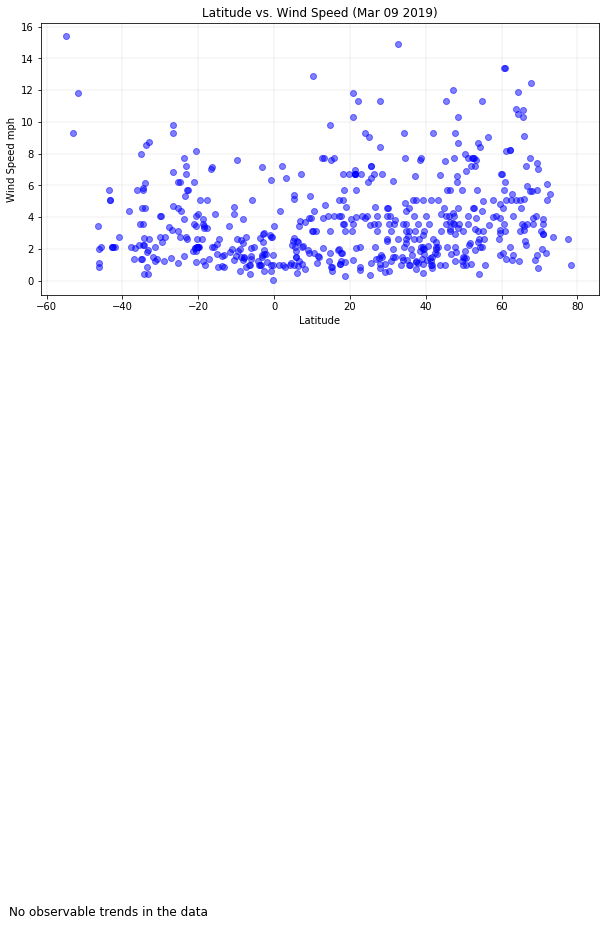

<Figure size 432x288 with 0 Axes>

In [16]:
#Scatterplot of Latitude vs Wind Speed
x = city_file_df['Latitude']
y = city_file_df['Wind Speed']
fig, ax = plt.subplots(figsize=(10,5))

for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="blue")

#add titles and labels
plt.title(f"Latitude vs. Wind Speed ({time_string})")
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')

#add gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5) 

#plot and save as a png
plt.show()
mp.savefig('Lat_vs_windspeed.png')